In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
np.set_printoptions(threshold=np.inf)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import boxcox

In [2]:
df = pd.read_csv(r'D:\Data Science\Files\LoansTrainingSet.csv', low_memory=False)
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0


In [3]:
# df = pd.read_csv('/Volumes/Samsung USB/Data Science/Files/LoansTrainingSet.csv', low_memory=False)
# df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

Null Values - 
    Credit Score
    Years in current job
    Annuial Income
    Months since last delinquent
    Bankruptcies
    Tax Liens
    Maxmimum Open Credit

Current Loan Amount - high amount of 9999999999
Customer IDs - multiple of the same
Credit Score - Has credit scores going up to 7510 after loan has been charged off
Years in current job - Convert from object to string to graph histogram
Annual Income - Need to remove decimals
Months since last delinquent - Need to remove decimals
Bankruptcies - Need to remove decimals
Tax Liens -
Monthly Debt - has an comma in it
Categories - multiple spelling of same thing

# Data Cleaning

## Current Loan Amount

In [6]:
df['Current Loan Amount'].describe()

count    2.569840e+05
mean     1.371331e+07
std      3.438131e+07
min      5.050000e+02
25%      8.299000e+03
50%      1.429800e+04
75%      2.436700e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [7]:
df['Current Loan Amount'].value_counts()

Current Loan Amount
99999999    35210
9820           59
9793           58
10132          56
10025          54
            ...  
26821           1
21333           1
1235            1
18028           1
17940           1
Name: count, Length: 27347, dtype: int64

In [8]:
df[df['Current Loan Amount']==99999999]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,3 years,Home Mortgage,64760.0,Debt Consolidation,$582.84,26.8,NaN,11,0,8880,22711,0.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744.0,6 years,Home Mortgage,65605.0,Debt Consolidation,$984.07,21.0,NaN,5,1,11514,17262,1.0,0.0
23,0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,Fully Paid,99999999,Short Term,745.0,10+ years,Rent,39476.0,other,$483.58,15.4,79.0,12,0,4636,21171,0.0,0.0
28,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,99999999,Short Term,724.0,1 year,Own Home,34297.0,Home Improvements,$777.38,13.6,2.0,12,0,6720,53335,0.0,0.0
42,0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,Fully Paid,99999999,Short Term,750.0,10+ years,Own Home,86785.0,Other,$56.41,22.0,NaN,7,0,3959,63862,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256938,fff2ae68-b9ca-4fb2-a53e-32684915bc6e,3a9268d1-a96b-4e7c-a022-8deea10d0b12,Fully Paid,99999999,Short Term,663.0,8 years,Home Mortgage,108482.0,Home Improvements,"$1,365.07",20.3,NaN,13,0,17264,23174,0.0,0.0
256953,fff72330-5397-4cbd-ad39-4d54bbc0dca9,a901d714-eaa1-4b31-b385-c51c0fa6eabd,Fully Paid,99999999,Short Term,698.0,7 years,Rent,65941.0,Debt Consolidation,"$1,364.97",21.5,NaN,16,0,19104,23556,0.0,0.0
256954,fff72f03-243b-422c-ab33-cb15e80e4c0d,f5cf8f78-6b65-4805-9b61-46086c441b08,Fully Paid,99999999,Short Term,742.0,10+ years,Rent,118128.0,Debt Consolidation,"$2,608.66",17.0,NaN,17,0,35089,55520,0.0,0.0
256963,fffb62c8-6149-4746-8b10-e1d2363f3b31,30e19db5-7ffe-4375-a253-f86dc565dfe8,Fully Paid,99999999,Short Term,738.0,10+ years,Rent,34749.0,Debt Consolidation,$833.98,11.0,25.0,17,0,3146,16050,0.0,0.0


In [9]:
fully_paid = df[df['Loan Status']== 'Fully Paid']
fully_paid['Current Loan Amount'].value_counts()

Current Loan Amount
99999999    35210
9793           42
9851           38
9820           37
5920           37
            ...  
1462            1
13117           1
1744            1
2307            1
29071           1
Name: count, Length: 25364, dtype: int64

In [10]:
df['Current Loan Amount'] = np.where(df['Current Loan Amount']==99999999, 0, df['Current Loan Amount'])

In [11]:
df['Current Loan Amount'].value_counts()

Current Loan Amount
0        35210
9820        59
9793        58
10132       56
10025       54
         ...  
26821        1
21333        1
1235         1
18028        1
17940        1
Name: count, Length: 27347, dtype: int64

In [12]:
df['Current Loan Amount'] = df.groupby('Loan ID')['Current Loan Amount'].transform(lambda x: x.max())

## Duplicate rows

seperate categorical features then group Customer ID and Loan ID with numerical features, 
Current Loan Amount - choose highest
Income - Choose minimum 
Credit Score - Choose minimum
Bankruptcies - Choose max

In [13]:
df['Loan ID'].value_counts()

Loan ID
3f6bd37a-b0bc-4d85-93c7-eea53df601fb    4
65b03871-1531-46ed-b805-a5df41477f03    4
744f26f5-685b-4c1d-89cc-8f32fef69373    4
7902a3ce-5054-4192-bf2f-bb597f3f870c    4
71121052-b403-4ec8-b3fc-25bb3223ed0d    4
                                       ..
5e122f17-d56f-4785-9912-a1a717b180e1    1
5e127563-cd0b-408c-9fc2-8066c4a3e965    1
5e12efa6-0bec-4b0d-bcea-454fa1ebc9f4    1
5e12f797-9600-4f00-965f-b76be5108331    1
ffffe32e-ed17-459f-9cfd-7b9ee7972933    1
Name: count, Length: 215700, dtype: int64

In [14]:
df['Loan ID'].nunique()

215700

In [15]:
df['Customer ID'].nunique()

215700

In [16]:
df[df['Loan ID']=='744f26f5-685b-4c1d-89cc-8f32fef69373']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
117035,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25255,Short Term,7330.0,10+ years,Own Home,150765.0,Debt Consolidation,"$3,304.27",32.5,NaN,16,0,53590,76667,0.0,0.0
117036,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25255,Short Term,7330.0,10+ years,Own Home,151530.0,Debt Consolidation,"$3,321.03",32.5,NaN,16,0,53862,77056,0.0,0.0
117037,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25255,Short Term,NaN,10+ years,Own Home,NaN,Debt Consolidation,"$3,321.03",32.5,NaN,16,0,53862,77056,0.0,0.0
117038,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25255,Short Term,733.0,10+ years,Own Home,150765.0,Debt Consolidation,"$3,304.27",32.5,NaN,16,0,53590,76667,0.0,0.0


In [17]:
df['Customer ID'].value_counts()

Customer ID
a96104f4-2f44-4112-82b9-75605d44dac3    4
abbb7bf6-908f-4500-bc46-a6b1b87d3d8a    4
0d1af0aa-9442-48ee-aa88-19bc3b5f2513    4
107aa25a-f027-444e-9a11-ab4bd884df85    4
cd3f6794-02bd-482b-a698-d03c0ab02f3d    4
                                       ..
796fa982-4c36-404f-91d8-9716ed267bad    1
f9666770-56c1-4635-afd4-657c7a63593a    1
da9c63fb-50c3-41a8-b495-eb13d792bb9b    1
b5fce597-d948-4b7e-b181-ad30248a1bfb    1
97281336-1e45-41d2-acb2-263ce56a590e    1
Name: count, Length: 215700, dtype: int64

In [18]:
df[df['Customer ID']=='a96104f4-2f44-4112-82b9-75605d44dac3']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
63716,3f6bd37a-b0bc-4d85-93c7-eea53df601fb,a96104f4-2f44-4112-82b9-75605d44dac3,Charged Off,15019,Short Term,6750.0,10+ years,Rent,49980.0,Business Loan,$394.01,12.8,NaN,4,0,1669,3097,0.0,0.0
63717,3f6bd37a-b0bc-4d85-93c7-eea53df601fb,a96104f4-2f44-4112-82b9-75605d44dac3,Charged Off,15019,Short Term,NaN,10+ years,Rent,NaN,Business Loan,$394.01,12.8,NaN,4,0,1669,3097,0.0,0.0
63718,3f6bd37a-b0bc-4d85-93c7-eea53df601fb,a96104f4-2f44-4112-82b9-75605d44dac3,Charged Off,15019,Short Term,675.0,10+ years,Rent,49635.0,Business Loan,$391.29,12.8,NaN,4,0,1658,3075,0.0,0.0
63719,3f6bd37a-b0bc-4d85-93c7-eea53df601fb,a96104f4-2f44-4112-82b9-75605d44dac3,Charged Off,15019,Short Term,675.0,10+ years,Rent,49635.0,Business Loan,$391.29,12.8,NaN,4,0,1658,3075,0.0,0.0


In [19]:
df['Loan ID'].value_counts()

Loan ID
3f6bd37a-b0bc-4d85-93c7-eea53df601fb    4
65b03871-1531-46ed-b805-a5df41477f03    4
744f26f5-685b-4c1d-89cc-8f32fef69373    4
7902a3ce-5054-4192-bf2f-bb597f3f870c    4
71121052-b403-4ec8-b3fc-25bb3223ed0d    4
                                       ..
5e122f17-d56f-4785-9912-a1a717b180e1    1
5e127563-cd0b-408c-9fc2-8066c4a3e965    1
5e12efa6-0bec-4b0d-bcea-454fa1ebc9f4    1
5e12f797-9600-4f00-965f-b76be5108331    1
ffffe32e-ed17-459f-9cfd-7b9ee7972933    1
Name: count, Length: 215700, dtype: int64

In [20]:
df[df['Customer ID']=='a96104f4-2f44-4112-82b9-75605d44dac3']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
63716,3f6bd37a-b0bc-4d85-93c7-eea53df601fb,a96104f4-2f44-4112-82b9-75605d44dac3,Charged Off,15019,Short Term,6750.0,10+ years,Rent,49980.0,Business Loan,$394.01,12.8,NaN,4,0,1669,3097,0.0,0.0
63717,3f6bd37a-b0bc-4d85-93c7-eea53df601fb,a96104f4-2f44-4112-82b9-75605d44dac3,Charged Off,15019,Short Term,NaN,10+ years,Rent,NaN,Business Loan,$394.01,12.8,NaN,4,0,1669,3097,0.0,0.0
63718,3f6bd37a-b0bc-4d85-93c7-eea53df601fb,a96104f4-2f44-4112-82b9-75605d44dac3,Charged Off,15019,Short Term,675.0,10+ years,Rent,49635.0,Business Loan,$391.29,12.8,NaN,4,0,1658,3075,0.0,0.0
63719,3f6bd37a-b0bc-4d85-93c7-eea53df601fb,a96104f4-2f44-4112-82b9-75605d44dac3,Charged Off,15019,Short Term,675.0,10+ years,Rent,49635.0,Business Loan,$391.29,12.8,NaN,4,0,1658,3075,0.0,0.0


## Credit Score

In [21]:
df['Credit Score'].value_counts(dropna=False)

Credit Score
NaN       61676
747.0      5669
740.0      5537
741.0      5499
746.0      5486
          ...  
6070.0        3
5980.0        3
5910.0        3
5930.0        2
5860.0        1
Name: count, Length: 335, dtype: int64

In [22]:
df[['Credit Score']].describe()

,Credit Score
count,195308.000000
mean,1251.116099
std,1762.016848
min,585.000000
25%,714.000000
50%,733.000000
75%,744.000000
max,7510.000000


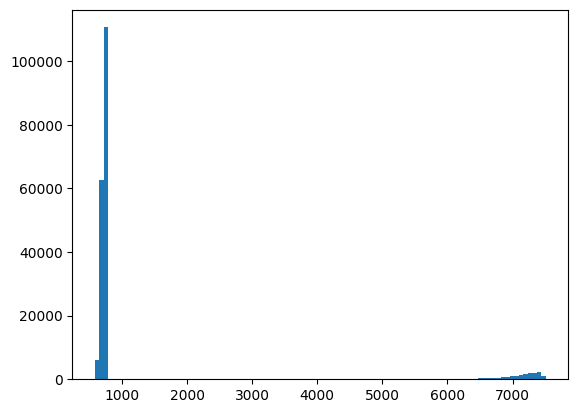

In [23]:
plt.hist(df['Credit Score'], bins=100);

In [24]:
df['Loan Status'].value_counts()

Loan Status
Fully Paid     176191
Charged Off     80793
Name: count, dtype: int64

In [25]:
paid_off = df[df['Loan Status'] == 'Fully Paid']

In [26]:
paid_off['Credit Score'].value_counts()

Credit Score
747.0    5141
746.0    4860
740.0    4624
741.0    4562
742.0    4430
         ... 
587.0       9
592.0       7
586.0       5
585.0       5
589.0       4
Name: count, Length: 167, dtype: int64

In [27]:
charged_off = df[df['Loan Status']== 'Charged Off']
charged_off['Credit Score'].value_counts()

Credit Score
739.0     937
741.0     937
740.0     913
737.0     898
738.0     868
         ... 
5940.0      3
6070.0      3
5910.0      3
5930.0      2
5860.0      1
Name: count, Length: 334, dtype: int64

In [28]:
credit_over = df[df['Credit Score'] > 800]
credit_over

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
55,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,6463,Short Term,7320.0,1 year,Own Home,25248.0,Debt Consolidation,$633.29,19.9,74.0,9,0,8025,24317,0.0,0.0
71,000f1140-ef9f-42f9-9898-f9b3162bf0da,442c2d9b-3d95-44a9-bcb4-0dc80a941e3c,Charged Off,6007,Short Term,7180.0,10+ years,Home Mortgage,43052.0,Debt Consolidation,$538.15,23.6,13.0,6,0,5077,7811,0.0,0.0
73,000f5c35-dc3e-415f-9c22-e355ef96d78b,0ecf29b6-93eb-4c13-b853-a9cbdfc7f85b,Charged Off,12899,Long Term,6670.0,2 years,Rent,133947.0,Debt Consolidation,"$1,931.07",18.4,7.0,16,0,39417,90199,0.0,0.0
79,001227a1-4490-47c6-ada7-20faf636e9a3,3d4a8985-0b72-4084-8b20-f441d9868483,Charged Off,5060,Short Term,7270.0,< 1 year,Home Mortgage,62738.0,Other,$711.03,20.4,22.0,6,0,10777,12041,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256946,fff5f918-967f-4cae-b8e8-0ec41b9d0a69,92093f79-1142-496c-8aef-0bc152ed8dd9,Charged Off,20658,Short Term,7450.0,10+ years,Rent,45963.0,Debt Consolidation,$792.86,17.4,NaN,10,0,13192,36143,0.0,0.0
256948,fff61503-051a-4bb8-8342-287939fa738a,b36620f7-d086-45c4-bfdc-b14c2187d0c6,Charged Off,20492,Short Term,7220.0,5 years,Rent,52511.0,Debt Consolidation,"$1,163.99",19.0,NaN,12,0,18732,24391,0.0,0.0
256952,fff6748f-e442-4848-9dd6-2252cb7396fd,6a54a6c9-3328-4ee0-bcb9-f4e8af37ff12,Charged Off,12262,Long Term,7410.0,NaN,Home Mortgage,40872.0,Debt Consolidation,$705.04,16.5,NaN,11,0,13892,22775,0.0,0.0
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953,Short Term,7170.0,10+ years,Home Mortgage,39844.0,Debt Consolidation,$982.82,11.7,NaN,9,1,4176,4783,1.0,0.0


In [29]:
credit_over['Loan Status'].value_counts()

Loan Status
Charged Off    16187
Name: count, dtype: int64

In [30]:
credit_over[['Credit Score']].describe()

,Credit Score
count,16187.000000
mean,7104.207698
std,312.341012
min,5850.000000
25%,6940.000000
50%,7190.000000
75%,7350.000000
max,7510.000000


In [31]:
# df['Credit Score'] = df['Credit Score'].apply(lambda x: x if x <= 800 else x/10)

In [32]:
# df['Credit Score'] = df.loc[df['Credit Score'] > 850, 'Credit Score'] // 10

In [33]:
df['Credit Score'] = np.where((df['Credit Score']> 850), df['Credit Score']//10, df['Credit Score'])

In [34]:
df['Credit Score'].value_counts()

Credit Score
740.0    5877
747.0    5862
741.0    5843
746.0    5736
742.0    5531
         ... 
590.0      22
589.0      22
585.0      21
593.0      19
591.0      18
Name: count, Length: 167, dtype: int64

In [35]:
df[['Home Ownership']].value_counts()

Home Ownership
Home Mortgage     124477
Rent              109010
Own Home           22923
HaveMortgage         574
Name: count, dtype: int64

In [36]:
df['Purpose'].value_counts()

Purpose
Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

In [37]:
df[df['Credit Score']>850].groupby(['Loan Status', 'Purpose'])['Credit Score'].mean()

Series([], Name: Credit Score, dtype: float64)

In [38]:
df['Credit Score'] = np.where(df['Credit Score']>850,  df.groupby(['Loan Status', 'Purpose'])['Credit Score'].transform(lambda x: x.fillna(x.mean())), df['Credit Score'])

In [39]:
credit_over['Credit Score'].describe()

count    16187.000000
mean      7104.207698
std        312.341012
min       5850.000000
25%       6940.000000
50%       7190.000000
75%       7350.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [40]:
df.groupby(['Loan Status', 'Purpose'])['Credit Score'].mean()

Loan Status  Purpose             
Charged Off  Business Loan           696.839559
             Buy House               695.064516
             Buy a Car               718.633721
             Debt Consolidation      711.451274
             Educational Expenses    726.037037
             Home Improvements       711.838202
             Medical Bills           705.011127
             Other                   707.610186
             Take a Trip             711.277333
             other                   700.960883
Fully Paid   Business Loan           714.154085
             Buy House               715.666667
             Buy a Car               733.815724
             Debt Consolidation      726.992246
             Educational Expenses    731.061538
             Home Improvements       727.703878
             Medical Bills           718.177374
             Other                   726.662408
             Take a Trip             722.048721
             other                   717.239231
Name: 

In [41]:
paid_off['Credit Score'].value_counts(dropna=False)

Credit Score
NaN      42209
747.0     5141
746.0     4860
740.0     4624
741.0     4562
         ...  
587.0        9
592.0        7
586.0        5
585.0        5
589.0        4
Name: count, Length: 168, dtype: int64

In [42]:
df['Credit Score'] = df.groupby(['Loan Status', 'Home Ownership'])['Credit Score'].transform(lambda x: x.fillna(x.mean()))

In [43]:
df['Credit Score'].value_counts(dropna=False)

Credit Score
727.360579    21369
725.048201    17023
709.437426     9138
711.111078     8477
740.000000     5877
              ...  
589.000000       22
590.000000       22
585.000000       21
593.000000       19
591.000000       18
Name: count, Length: 175, dtype: int64

In [44]:
df['Credit Score'].isnull().sum()

0

In [45]:
df['Credit Score'].dtype

dtype('float64')

In [46]:
df['Credit Score'] = df['Credit Score'].astype(int)

In [47]:
df['Credit Score'].dtype

dtype('int32')

In [48]:
df['Credit Score'] = df['Credit Score'].round()

In [49]:
df['Credit Score'].min()

585

In [50]:
df['Credit Score'].describe()

count    256984.000000
mean        721.135269
std          24.448137
min         585.000000
25%         711.000000
50%         727.000000
75%         738.000000
max         751.000000
Name: Credit Score, dtype: float64

In [51]:
df['Credit Score'] = df.groupby('Loan ID')['Credit Score'].transform(lambda x: x.min())

## Years in current job

Nulls might be no work experience

In [52]:
df['Years in current job'].value_counts(dropna=False)

Years in current job
10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
NaN          11476
9 years       9932
Name: count, dtype: int64

In [53]:
df[['Years in current job']].describe()

,Years in current job
count,245508
unique,11
top,10+ years
freq,78896


In [54]:
df['Years in current job'] = df['Years in current job'].astype(str)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '10+ years'),
  Text(1, 0, '4 years'),
  Text(2, 0, '6 years'),
  Text(3, 0, '5 years'),
  Text(4, 0, 'nan'),
  Text(5, 0, '3 years'),
  Text(6, 0, '2 years'),
  Text(7, 0, '< 1 year'),
  Text(8, 0, '1 year'),
  Text(9, 0, '7 years'),
  Text(10, 0, '9 years'),
  Text(11, 0, '8 years')])

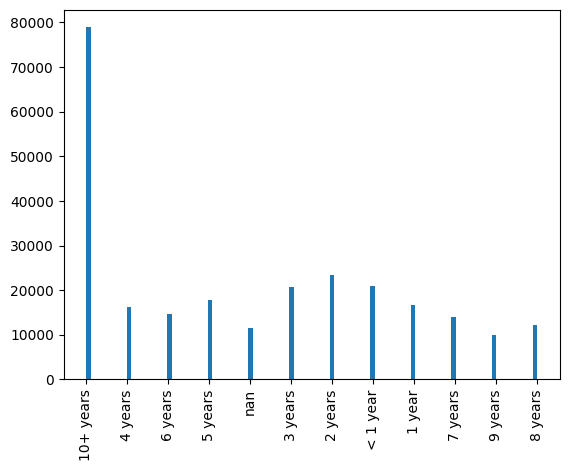

In [55]:
plt.hist(df['Years in current job'], bins=100);
plt.xticks(rotation=90)

In [56]:
df['Years in current job'] = df['Years in current job'].map({'< 1 year': 0.5, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10})

In [57]:
df['Years in current job'].value_counts(dropna=False)

Years in current job
10.0    78896
2.0     23462
0.5     21012
3.0     20659
5.0     17864
1.0     16746
4.0     16166
6.0     14597
7.0     13968
8.0     12206
NaN     11476
9.0      9932
Name: count, dtype: int64

In [58]:
df['Years of Credit History'].value_counts(dropna=False)

Years of Credit History
16.0    3563
15.0    3379
17.0    3080
16.5    2963
14.0    2954
        ... 
52.8       1
54.6       1
3.7        1
65.8       1
60.7       1
Name: count, Length: 541, dtype: int64

In [59]:
df['Years of Credit History'] = df['Years of Credit History'].round()

In [60]:
df.groupby(['Years of Credit History'])['Years in current job'].mean()

Years of Credit History
3.0     8.000000
4.0     3.400621
5.0     3.309458
6.0     3.298784
7.0     3.436381
          ...   
61.0    9.000000
62.0    6.500000
65.0    9.000000
66.0    7.500000
70.0    6.000000
Name: Years in current job, Length: 63, dtype: float64

In [61]:
# df['Years in current job'] = np.where(df['Years in current job'])

In [62]:
df['Years in current job'] = df.groupby(['Years of Credit History'])['Years in current job'].transform(lambda x: x.fillna(x.mean()))

In [63]:
df['Years in current job'].isnull().sum()

0

In [64]:
df['Years in current job'].value_counts()

Years in current job
10.000000    78901
2.000000     23462
0.500000     21012
3.000000     20659
5.000000     17864
             ...  
7.250000         6
5.772727         6
6.500000         5
3.400621         4
7.625000         2
Name: count, Length: 66, dtype: int64

In [65]:
df['Years in current job'] = df['Years in current job'].round()

In [66]:
df['Years in current job'].value_counts()

Years in current job
10.0    78901
2.0     23462
0.0     21012
3.0     20767
7.0     20134
5.0     18872
6.0     18248
1.0     16746
4.0     16700
8.0     12208
9.0      9934
Name: count, dtype: int64

## Home Ownership

In [67]:
df['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: count, dtype: int64

In [68]:
df['Home Ownership'] = np.where(df['Home Ownership']== 'HaveMortgage', 'Home Mortgage', df['Home Ownership'])

## Monthly Debt

In [69]:
df['Monthly Debt'] = df.groupby('Loan ID')['Monthly Debt'].transform(lambda x: x.max())

## Annual Income

In [70]:
df['Annual Income'].value_counts(dropna=False)

Annual Income
NaN         61676
60684.0        31
61188.0        30
59646.0        30
49630.0        30
            ...  
65276.0         1
254462.0        1
126888.0        1
98337.0         1
30854.0         1
Name: count, Length: 60559, dtype: int64

In [71]:
df[['Annual Income']].describe()

,Annual Income
count,1.953080e+05
mean,7.195272e+04
std,5.887757e+04
min,0.000000e+00
25%,4.432100e+04
50%,6.124200e+04
75%,8.646200e+04
max,8.713547e+06


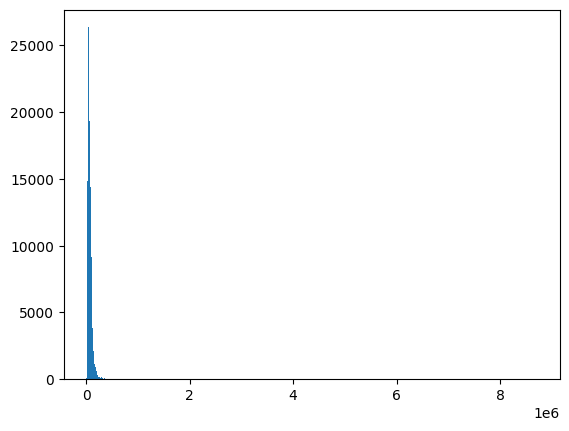

In [72]:
plt.hist(df['Annual Income'], bins = 1000);

In [73]:
df.groupby(['Loan Status', 'Home Ownership'])['Annual Income'].mean()

Loan Status  Home Ownership
Charged Off  Home Mortgage     75884.929789
             Own Home          60682.710661
             Rent              57504.085003
Fully Paid   Home Mortgage     84810.785317
             Own Home          67562.113262
             Rent              63605.118456
Name: Annual Income, dtype: float64

In [74]:
df.groupby(['Home Ownership', 'Years in current job'])['Annual Income'].mean()

Home Ownership  Years in current job
Home Mortgage   0.0                     81650.220731
                1.0                     82295.481081
                2.0                     84147.163424
                3.0                     82806.468464
                4.0                     81515.569587
                5.0                     79685.802563
                6.0                     75097.990408
                7.0                     74726.238274
                8.0                     81356.301080
                9.0                     81726.786275
                10.0                    85632.281032
Own Home        0.0                     59905.151261
                1.0                     59472.150362
                2.0                     64432.477931
                3.0                     64956.416539
                4.0                     63171.757463
                5.0                     62416.730549
                6.0                     57952.902883
         

In [75]:
df['Annual Income'] = df.groupby(['Home Ownership', 'Years in current job'])['Annual Income'].transform(lambda x: x.fillna(x.mean()))

In [76]:
df['Annual Income'].isnull().sum()

0

In [77]:
df['Annual Income'].value_counts()

Annual Income
85632.281032     11474
67821.414277      5602
59457.772688      2999
61160.839473      2972
74726.238274      2477
                 ...  
235560.000000        1
167117.000000        1
118390.000000        1
59287.000000         1
30854.000000         1
Name: count, Length: 60591, dtype: int64

In [78]:
df['Annual Income'] = df['Annual Income'].round()

In [79]:
df['Annual Income'] = df.groupby('Loan ID')['Annual Income'].transform(lambda x: x.min())

## Purpose

In [80]:
df['Purpose'].value_counts()

Purpose
Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

In [81]:
df['Purpose'] = np.where(df['Purpose'] == 'other', 'Other', df['Purpose']) 

## Years of Credit History

In [82]:
df['Years of Credit History'] = df.groupby('Loan ID')['Years of Credit History'].transform(lambda x: x.min())        

## Months since last delinquent

Fill NA with high value since they last were delinquent so longer the better

In [83]:
df['Months since last delinquent'].value_counts(dropna=False)

Months since last delinquent
NaN      140383
12.0       2224
14.0       2196
15.0       2189
8.0        2164
          ...  
122.0         1
98.0          1
143.0         1
140.0         1
119.0         1
Name: count, Length: 132, dtype: int64

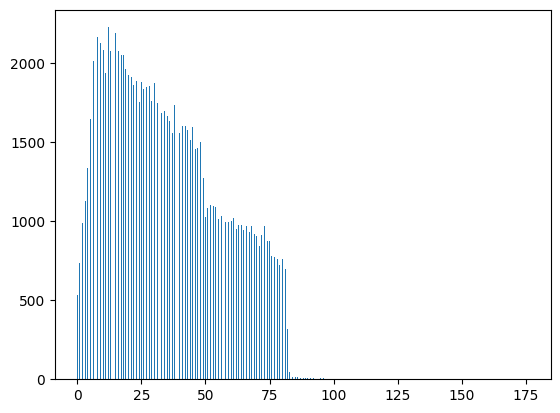

In [84]:
plt.hist(df['Months since last delinquent'], bins=500);

In [85]:
df.groupby(['Loan Status', 'Purpose'])['Months since last delinquent'].mean()

Loan Status  Purpose             
Charged Off  Business Loan           30.694915
             Buy House               30.552885
             Buy a Car               35.860294
             Debt Consolidation      34.459648
             Educational Expenses    26.833333
             Home Improvements       32.791383
             Medical Bills           33.893082
             Other                   33.394016
             Take a Trip             34.046296
Fully Paid   Business Loan           34.488827
             Buy House               34.414433
             Buy a Car               36.021422
             Debt Consolidation      35.342287
             Educational Expenses    30.693333
             Home Improvements       34.993784
             Medical Bills           32.758389
             Other                   34.996232
             Take a Trip             33.660944
Name: Months since last delinquent, dtype: float64

In [86]:
df['Months since last delinquent'] = np.where(df['Bankruptcies']==0, 0, df['Months since last delinquent'])

In [87]:
df['Months since last delinquent'] = df.groupby(['Loan Status', 'Purpose'])['Months since last delinquent'].transform(lambda x: x.fillna(x.mean()))

In [88]:
df['Months since last delinquent'].isnull().sum()

0

In [89]:
df['Months since last delinquent'] = df['Months since last delinquent'].round()

In [90]:
df['Months since last delinquent'] = df.groupby('Loan ID')['Months since last delinquent'].transform(lambda x: x.min())

## Number of Open Accounts

In [91]:
df['Number of Open Accounts'] = df.groupby('Loan ID')['Number of Open Accounts'].transform(lambda x: x.min())

## Number of Credit Problems

In [92]:
df['Number of Credit Problems'] = df.groupby('Loan ID')['Number of Credit Problems'].transform(lambda x: x.max())

## Current Credit Balance

In [93]:
df['Current Credit Balance'] = df.groupby('Loan ID')['Current Credit Balance'].transform(lambda x: x.max())

## Tax Liens

In [94]:
df['Tax Liens'].value_counts(dropna=False)

Tax Liens
0.0     252322
1.0       3276
2.0        872
3.0        247
4.0        124
5.0         61
6.0         30
NaN         23
9.0         10
8.0          8
7.0          6
10.0         3
11.0         2
Name: count, dtype: int64

In [95]:
df[['Tax Liens']].describe()

,Tax Liens
count,256961.000000
mean,0.027203
std,0.245950
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,11.000000


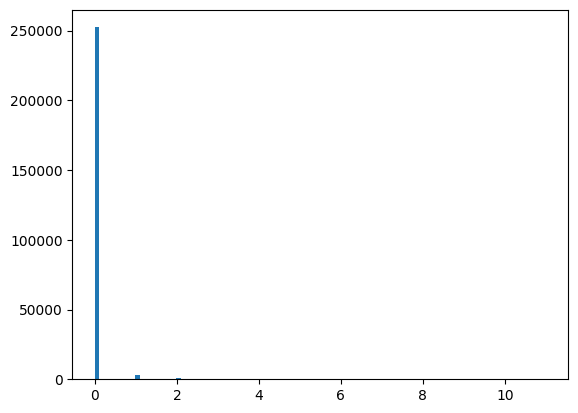

In [96]:
plt.hist(df['Tax Liens'], bins=100);

In [97]:
df.groupby(['Loan Status'])['Tax Liens'].mean()

Loan Status
Charged Off    0.031773
Fully Paid     0.025106
Name: Tax Liens, dtype: float64

In [98]:
df['Tax Liens'] = np.where(df['Tax Liens'].isnull, 0, df['Tax Liens'])

In [99]:
df['Tax Liens'].isnull().sum()

0

In [100]:
df['Tax Liens'] = df.groupby('Loan ID')['Tax Liens'].transform(lambda x: x.max())

## Bankruptcies 

In [101]:
df['Bankruptcies'].value_counts(dropna=False)

Bankruptcies
0.0    229661
1.0     25605
2.0       957
NaN       529
3.0       180
4.0        33
5.0        15
6.0         3
7.0         1
Name: count, dtype: int64

In [102]:
no_bank = df[df['Bankruptcies']==0]
no_bank

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741,10.0,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.0,0.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734,4.0,Home Mortgage,42269.0,Other,"$1,106.04",26.0,0.0,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747,10.0,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",29.0,0.0,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747,10.0,Own Home,38072.0,Debt Consolidation,$751.92,26.0,0.0,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746,4.0,Rent,50025.0,Debt Consolidation,$355.18,12.0,0.0,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,725,2.0,Rent,61161.0,Debt Consolidation,"$1,706.58",20.0,0.0,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737,10.0,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.0,0.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746,9.0,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.0,0.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746,9.0,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.0,0.0,8,0,3315,20090,0.0,0.0


In [103]:
no_bank[no_bank['Months since last delinquent'].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


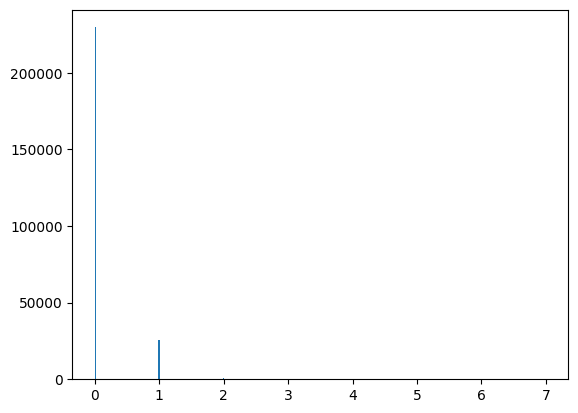

In [104]:
plt.hist(df['Bankruptcies'], bins = 300);

In [105]:
df.groupby(['Tax Liens'])['Bankruptcies'].mean()

Tax Liens
0.0    0.110316
Name: Bankruptcies, dtype: float64

In [106]:
df['Bankruptcies'] = df.groupby('Tax Liens')['Bankruptcies'].transform(lambda x: x.fillna(x.mean())).round()

In [107]:
df['Bankruptcies'].isnull().sum()

0

In [108]:
df['Bankruptcies'].value_counts()

Bankruptcies
0.0    230190
1.0     25605
2.0       957
3.0       180
4.0        33
5.0        15
6.0         3
7.0         1
Name: count, dtype: int64

In [109]:
df['Bankruptcies'] = df.groupby('Loan ID')['Bankruptcies'].transform(lambda x: x.max())

## Monthly Debt

In [110]:
df[df['Monthly Debt']=='$584.03']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741,10.0,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.0,0.0,10,0,6760,16056,0.0,0.0
5683,05b255e0-04d1-4a57-a9d8-59f80acd3e07,3b02e922-f50f-42e2-be24-f351dd578e3b,Fully Paid,9955,Short Term,743,2.0,Rent,39820.0,Debt Consolidation,$584.03,13.0,0.0,6,0,8417,15139,0.0,0.0
64832,407f7a9c-8928-42e3-8153-61baa58ecc3c,b5be724c-da38-438f-9cf7-e9698ed9bb91,Fully Paid,5045,Short Term,748,1.0,Rent,47418.0,Debt Consolidation,$584.03,20.0,0.0,10,0,6885,32323,0.0,0.0
65981,41a05cca-9496-42d9-87c6-9ccb4764e3cc,466465e1-5bd3-4f61-a3b5-9171d3a692bb,Fully Paid,16192,Short Term,698,10.0,Home Mortgage,54328.0,Debt Consolidation,$584.03,19.0,19.0,7,1,10857,11839,1.0,0.0
74498,4a00854a-d2df-41d5-8596-7995e46d3ce2,8b0e46e2-f943-47c7-9bff-060f0d5c0df8,Fully Paid,0,Short Term,704,10.0,Rent,50060.0,Debt Consolidation,$584.03,24.0,0.0,4,0,14750,18120,0.0,0.0
77295,4cbc9090-75df-4961-b8bf-bb4b8dc63430,a08c1b54-2fed-41f2-9fd0-0cd48d7d868b,Charged Off,34783,Long Term,733,10.0,Home Mortgage,81492.0,Business Loan,$584.03,31.0,0.0,10,0,11224,17267,0.0,0.0
77296,4cbc9090-75df-4961-b8bf-bb4b8dc63430,a08c1b54-2fed-41f2-9fd0-0cd48d7d868b,Charged Off,34783,Long Term,733,10.0,Home Mortgage,81492.0,Business Loan,$584.03,31.0,0.0,10,0,11224,17267,0.0,0.0


In [111]:
df[df['Monthly Debt']=='$584.03'].dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                      int32
Years in current job            float64
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [112]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '')

In [113]:
df['Monthly Debt']

0            584.03
1         1,106.04 
2         1,321.85 
3            751.92
4            355.18
            ...    
256979    1,706.58 
256980    1,376.47 
256981       297.96
256982       297.96
256983    2,525.82 
Name: Monthly Debt, Length: 256984, dtype: object

In [114]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace(',', '').astype(float)

In [115]:
df['Monthly Debt']

0          584.03
1         1106.04
2         1321.85
3          751.92
4          355.18
           ...   
256979    1706.58
256980    1376.47
256981     297.96
256982     297.96
256983    2525.82
Name: Monthly Debt, Length: 256984, dtype: float64

In [116]:
df['Monthly Debt'].value_counts(dropna=False)

Monthly Debt
0.00       254
775.08      12
679.66      12
1095.88     12
636.87      12
          ... 
1625.48      1
1469.45      1
1255.99      1
1386.83      1
2525.82      1
Name: count, Length: 128755, dtype: int64

## Maximum Open Credit

In [117]:
df['Maximum Open Credit'].value_counts(dropna=False)

Maximum Open Credit
0        1831
11044      21
10180      21
16303      20
9082       20
         ... 
83568       1
78638       1
57799       1
45584       1
62371       1
Name: count, Length: 68987, dtype: int64

In [118]:
df[df['Maximum Open Credit']=='#VALUE!']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
184662,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,709,2.0,Rent,39200.0,Debt Consolidation,506.34,15.0,0.0,3,0,0,#VALUE!,0.0,0.0
184663,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,709,2.0,Rent,39200.0,Debt Consolidation,506.34,15.0,0.0,3,0,0,#VALUE!,0.0,0.0
187512,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,23897,Long Term,697,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,0.0,6,0,0,#VALUE!,0.0,0.0
187513,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,23897,Long Term,697,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,0.0,6,0,0,#VALUE!,0.0,0.0


In [119]:
df['Maximum Open Credit'] = np.where(df['Maximum Open Credit']=='#VALUE!', 0, df['Maximum Open Credit'])

In [120]:
df['Maximum Open Credit'] = df.groupby('Loan ID')['Maximum Open Credit'].transform(lambda x:x.min())

In [121]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.0,0.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734,4.0,Home Mortgage,42269.0,Other,1106.04,26.0,0.0,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,29.0,0.0,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.0,0.0,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746,4.0,Rent,50025.0,Debt Consolidation,355.18,12.0,0.0,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,725,2.0,Rent,61161.0,Debt Consolidation,1706.58,20.0,0.0,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737,10.0,Own Home,77186.0,Debt Consolidation,1376.47,19.0,0.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746,9.0,Home Mortgage,52504.0,Debt Consolidation,297.96,15.0,0.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746,9.0,Home Mortgage,52504.0,Debt Consolidation,297.96,15.0,0.0,8,0,3315,20090,0.0,0.0


In [122]:
df[df['Maximum Open Credit']==0]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
184662,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,709,2.0,Rent,39200.0,Debt Consolidation,506.34,15.0,0.0,3,0,0,0,0.0,0.0
184663,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,709,2.0,Rent,39200.0,Debt Consolidation,506.34,15.0,0.0,3,0,0,0,0.0,0.0
187512,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,23897,Long Term,697,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,0.0,6,0,0,0,0.0,0.0
187513,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,23897,Long Term,697,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,0.0,6,0,0,0,0.0,0.0


In [123]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(int)

## Drop duplicates

In [124]:
df = df.drop_duplicates(subset='Loan ID')

In [125]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.0,0.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734,4.0,Home Mortgage,42269.0,Other,1106.04,26.0,0.0,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,29.0,0.0,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.0,0.0,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746,4.0,Rent,50025.0,Debt Consolidation,355.18,12.0,0.0,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953,Short Term,717,10.0,Home Mortgage,39844.0,Debt Consolidation,982.82,12.0,2.0,9,1,4176,4783,1.0,0.0
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,725,2.0,Rent,61161.0,Debt Consolidation,1706.58,20.0,0.0,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737,10.0,Own Home,77186.0,Debt Consolidation,1376.47,19.0,0.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746,9.0,Home Mortgage,52504.0,Debt Consolidation,297.96,15.0,0.0,8,0,3315,20090,0.0,0.0


In [126]:
df['Loan ID'].value_counts()

Loan ID
000025bb-5694-4cff-b17d-192b1a98ba44    1
aa9461f5-1536-41f9-be2b-ff8a210932d8    1
aa8e9502-8b68-4480-8d5d-6203f617c9b1    1
aa8f5ce4-76f3-4fae-9a07-58cc65d90271    1
aa8fa68c-960a-40c4-9a7c-04db7bb92e1b    1
                                       ..
55527f06-c930-4fe1-bbcb-3610ae3649ed    1
5552da49-009b-4a24-9f37-b0fe36cd48aa    1
555312ca-ddc5-4814-9d88-e01c1986f708    1
555408d1-c1cf-47a0-8b1e-1e42a0e40f1a    1
ffffe32e-ed17-459f-9cfd-7b9ee7972933    1
Name: count, Length: 215700, dtype: int64

In [127]:
df['Loan ID'].nunique()

215700

In [128]:
df['Customer ID'].value_counts()

Customer ID
5ebc8bb1-5eb9-4404-b11b-a6eebc401a19    1
73f51959-7841-4414-87f7-b184439abb7f    1
a9a27cdd-38dd-4b4a-b237-795dbeadead7    1
b9a68927-ea4f-45a2-baee-081e79f58c25    1
6306927d-d943-4ec8-981c-a39cfbe27515    1
                                       ..
33a0dbd1-cff4-4e94-96d2-08905459671d    1
b39c2723-1e19-4ee1-83ea-35aa2f8ff27c    1
a80f8403-9ae5-43c4-b841-cba6a0a0be53    1
31f70181-1a81-4211-9fa5-92eadd9cec55    1
97281336-1e45-41d2-acb2-263ce56a590e    1
Name: count, Length: 215700, dtype: int64

In [129]:
df['Customer ID'].nunique()

215700

# Feature Engineering

Total Debt
Debt to Income
Credit Utilization

## Debt to Income

In [130]:
df['DTI'] = df['Current Credit Balance']/df['Annual Income']

C:\Users\rvuon\AppData\Local\Temp\ipykernel_32452\3806466396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DTI'] = df['Current Credit Balance']/df['Annual Income']


In [131]:
df['Current Credit Balance'].describe()

count    2.157000e+05
mean     1.545778e+04
std      1.975069e+04
min      0.000000e+00
25%      5.933000e+03
50%      1.104200e+04
75%      1.932600e+04
max      1.731412e+06
Name: Current Credit Balance, dtype: float64

In [132]:
df['DTI'].describe()

count    2.157000e+05
mean              inf
std               NaN
min      0.000000e+00
25%      9.780561e-02
50%      1.790247e-01
75%      2.960856e-01
max               inf
Name: DTI, dtype: float64

In [133]:
df.loc[np.isinf(df['DTI']), 'DTI'] = 0

In [134]:
df.loc[:,'DTI'] = np.where(np.isinf(df['DTI']), 0, df['DTI'])

## Credit Utilization

In [135]:
df['Current Credit Balance'].dtype

dtype('int64')

In [136]:
df['Maximum Open Credit'].dtype

dtype('int32')

In [137]:
df['Maximum Open Credit'].astype(int)

0         16056
1         19149
2         28335
3         43915
4         37081
          ...  
256977     4783
256979    44080
256980     9758
256981    20090
256983    62371
Name: Maximum Open Credit, Length: 215700, dtype: int32

In [138]:
df.loc[:, 'Current Credit Balance'] = pd.to_numeric(df['Current Credit Balance'], errors='coerce')
df.loc[:, 'Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'], errors='coerce')

In [139]:
# df['Current Credit Balance'] = pd.to_numeric(df['Current Credit Balance'], errors='coerce')
# df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'], errors='coerce')

In [140]:
df['Maximum Open Credit'].min()

0

In [141]:
df['Current Credit Balance'].min()

0

In [142]:
# df.loc[:, 'Credit Utilization'] = np.where(df['Maximum Open Credit'] != 0, df['Current Credit Balance']/df['Maximum Open Credit'], np.nan)


In [143]:
# df.loc[df['Credit Utilization'].isnull(), 'Credit Utilization'] = 0

In [144]:
df.loc[:,'Credit Utilization'] = df['Current Credit Balance']/df['Maximum Open Credit']

C:\Users\rvuon\AppData\Local\Temp\ipykernel_32452\1161269067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Credit Utilization'] = df['Current Credit Balance']/df['Maximum Open Credit']


In [145]:
df.loc[:, 'Credit Utilization'] = np.where((df['Credit Utilization'].isnull()) | np.isinf(df['Credit Utilization']), 0, df['Credit Utilization'])

In [146]:
df['Credit Utilization'].value_counts()

Credit Utilization
0.000000    1589
0.500000     180
0.750000      77
0.600000      65
0.400000      55
            ... 
0.565000       1
0.797000       1
0.387994       1
0.177964       1
0.454009       1
Name: count, Length: 210444, dtype: int64

# Transformation

In [147]:
df[['Current Loan Amount', 'Credit Score', 'Years in current job', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'DTI']].skew()

Current Loan Amount               0.687024
Credit Score                     -1.854010
Years in current job             -0.202706
Annual Income                    49.370771
Monthly Debt                      2.011400
Years of Credit History           1.095347
Months since last delinquent      5.638946
Number of Credit Problems         4.695709
Current Credit Balance           14.295872
Maximum Open Credit             222.632567
Bankruptcies                      3.414959
Tax Liens                         0.000000
DTI                              13.906092
dtype: float64

## Current Loan Amount

In [148]:
df['Current Loan Amount'].min()

0

In [149]:
np.log1p(df['Current Loan Amount']).skew() #actually made it worse then I won't use it

-1.6998868149583313

## Credit Score

In [150]:
bc_credit_score, l = boxcox(df['Credit Score'])

In [151]:
pd.Series(bc_credit_score).skew()

-0.17682078279281987

## Annual Income

In [152]:
df['Annual Income'].min()

0.0

In [153]:
df['Annual Income'].max()

8713547.0

In [154]:
np.log1p(df['Annual Income']).skew()

-0.024520675757997396

## monthly debt

In [155]:
df['Monthly Debt'].min()

0.0

In [156]:
np.log1p(df['Monthly Debt']).skew()

-1.5867677343113205

## Years of Credit History

In [157]:
bc_years_of_credit_history, l = boxcox(df['Years of Credit History'])
pd.Series(bc_years_of_credit_history).skew()

0.0027893801864358574

## Months since last delinquent

In [158]:
df['Months since last delinquent'].min()

0.0

In [159]:
np.log1p(df['Months since last delinquent']).skew()

3.908368130932477

## Number of Credit Problems

In [160]:
df['Number of Credit Problems'].min()

0

In [161]:
np.log1p(df['Number of Credit Problems']).skew()

2.6489642917930967

## Current Credit Balance

In [162]:
df['Current Credit Balance'].min()

0

In [163]:
np.log1p(df['Current Credit Balance']).skew()

-2.979483149898729

## Maximum Open Credit 

In [164]:
df['Maximum Open Credit'].min()

0

In [165]:
np.log1p(df['Maximum Open Credit']).skew()

-4.0732148575604326

## Bankruptcies

In [166]:
np.log1p(df['Bankruptcies']).skew()

2.7562940963932623

## DTI

In [167]:
np.log1p(df['DTI']).skew()

2.1290286403015846

# Scaling and Encoding

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215700 entries, 0 to 256983
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       215700 non-null  object 
 1   Customer ID                   215700 non-null  object 
 2   Loan Status                   215700 non-null  object 
 3   Current Loan Amount           215700 non-null  int64  
 4   Term                          215700 non-null  object 
 5   Credit Score                  215700 non-null  int32  
 6   Years in current job          215700 non-null  float64
 7   Home Ownership                215700 non-null  object 
 8   Annual Income                 215700 non-null  float64
 9   Purpose                       215700 non-null  object 
 10  Monthly Debt                  215700 non-null  float64
 11  Years of Credit History       215700 non-null  float64
 12  Months since last delinquent  215700 non-null  fl

In [169]:
df.sample(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,DTI,Credit Utilization
77770,4d2e46e0-6f05-4a02-afb1-150fd9c5053d,a3be728b-ea4d-4b79-bbf9-4ea2ccd11c40,Fully Paid,23237,Long Term,725,10.0,Rent,67821.0,Debt Consolidation,...,10.0,0.0,14,0,28963,54545,0.0,0.0,0.427051,0.530993
120348,779eb19d-6e12-48ac-9de1-c567efcd9b8e,4b252c5f-2c90-4357-93d6-90b55cf3dd2d,Fully Paid,8952,Short Term,736,10.0,Home Mortgage,57496.0,Debt Consolidation,...,20.0,0.0,5,0,5106,6359,0.0,0.0,0.088806,0.802956
138558,89e2c64b-601e-4a90-93a7-3354237b7149,65b85165-357d-4b32-b2b6-b794b5356da2,Fully Paid,18826,Long Term,725,0.0,Rent,59458.0,Debt Consolidation,...,27.0,0.0,21,0,23271,52294,0.0,0.0,0.391386,0.445003
216789,d7bcd825-7775-41f6-a856-d879a5374158,7ff08e15-9719-4d65-9859-109fbfb3b31c,Fully Paid,24578,Short Term,725,8.0,Rent,62503.0,Debt Consolidation,...,13.0,0.0,13,0,33245,58427,0.0,0.0,0.531894,0.569001
14508,0e781c1e-50cb-4eaf-b7b2-b82c39e39147,521ba900-18d1-49e4-8b01-5dde94951914,Charged Off,6048,Short Term,703,10.0,Rent,43344.0,Other,...,15.0,0.0,6,0,6724,7056,0.0,0.0,0.155131,0.952948
94933,5e5f75ca-bd1b-4cc1-8263-65c6e7a56684,1b720f9a-98be-495f-86e5-c53d5d50eced,Fully Paid,31939,Long Term,727,7.0,Home Mortgage,74726.0,Debt Consolidation,...,16.0,0.0,13,0,12223,32508,0.0,0.0,0.163571,0.376000
39875,27a9c30f-e3db-4d40-aa4b-004a0891de29,3788b1fe-65de-421b-b2a3-a1d9a67280c6,Fully Paid,0,Short Term,735,10.0,Home Mortgage,51855.0,Debt Consolidation,...,19.0,0.0,6,0,30543,47947,0.0,0.0,0.589008,0.637016
193182,c01e55e8-85ef-4506-9c62-52d791d35b44,ced5b939-0c61-451a-a044-98e4d52689af,Fully Paid,7068,Short Term,739,1.0,Home Mortgage,35340.0,Debt Consolidation,...,11.0,12.0,8,1,1232,4248,1.0,0.0,0.034861,0.290019
90265,59b46e4b-49b4-43eb-b623-7106e743a754,84753521-f4b6-4a0f-928d-1ad43b3d925c,Fully Paid,14789,Short Term,727,10.0,Home Mortgage,85632.0,Debt Consolidation,...,20.0,0.0,7,0,10554,13905,0.0,0.0,0.123248,0.759008
97737,6133aeab-9672-4be5-acb6-05406b7edc30,c4dc7dfe-2d0e-42f9-a328-c809e30150e9,Fully Paid,0,Short Term,721,10.0,Home Mortgage,87963.0,Debt Consolidation,...,16.0,0.0,7,0,12090,28583,0.0,0.0,0.137444,0.422979


Ordinal
-------------
Loan Status
Years in current job
DTI
Credit Utilization





Nominal
-------------
Term
Home Ownership
Purpose




Continuous
-------------
Credit Score
Current Loan Amount

Annual Income
Monthly Debt
Years of Credit History
Months since last delinquent
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Maximum Open Credit
Bankruptcies
Tax Liens






## Encoding

In [170]:
oe = OrdinalEncoder()
ord_feats = df[['Loan Status', 'Years in current job']]
oe.fit(ord_feats)
ord_feats_encoded = oe.transform(ord_feats)
ord_feats_encoded
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats


,Loan Status,Years in current job
0,1.0,10.0
1,1.0,4.0
2,1.0,10.0
3,1.0,10.0
4,1.0,4.0
...,...,...
215695,0.0,10.0
215696,1.0,2.0
215697,1.0,10.0
215698,0.0,9.0


In [171]:
drop_ord = ['Loan Status', 'Years in current job']
df.drop(columns=drop_ord, inplace=True)
df = df.merge(new_ord_feats, left_index=True, right_index=True)
df

C:\Users\rvuon\AppData\Local\Temp\ipykernel_32452\3028304768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=drop_ord, inplace=True)


,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,...,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,DTI,Credit Utilization,Loan Status,Years in current job
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520,Short Term,741,Home Mortgage,33694.0,Debt Consolidation,584.03,12.0,...,10,0,6760,16056,0.0,0.0,0.200629,0.421026,1.0,10.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441,Short Term,734,Home Mortgage,42269.0,Other,1106.04,26.0,...,17,0,6262,19149,0.0,0.0,0.148146,0.327014,1.0,4.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029,Short Term,747,Home Mortgage,90126.0,Debt Consolidation,1321.85,29.0,...,5,0,20967,28335,0.0,0.0,0.232641,0.739968,1.0,10.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743,Short Term,747,Own Home,38072.0,Debt Consolidation,751.92,26.0,...,9,0,22529,43915,0.0,0.0,0.591747,0.513014,1.0,10.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731,Short Term,746,Rent,50025.0,Debt Consolidation,355.18,12.0,...,12,0,17391,37081,0.0,0.0,0.347646,0.469000,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215693,d6a02bea-8ac9-416d-8eb6-f252b8262025,791d6703-d5b4-4307-9adc-7f8a45541ff0,9903,Short Term,733,Home Mortgage,43771.0,Debt Consolidation,718.58,9.0,...,9,0,10165,20210,0.0,0.0,0.232231,0.502969,0.0,0.0
215694,d6a04026-fb1d-4b17-8fca-126bc484e2de,4e131c66-6a4d-4ae1-8d9e-018ff104c173,3416,Short Term,709,Home Mortgage,88470.0,Debt Consolidation,1216.46,10.0,...,4,1,960,2065,0.0,0.0,0.010851,0.464891,0.0,9.0
215695,d6a04af1-4ebd-478d-a408-a6f310c1a3fa,98b6332d-fbc1-45a8-b937-26ee78c0c576,16208,Short Term,708,Rent,38676.0,Debt Consolidation,689.73,13.0,...,13,0,2532,35171,0.0,0.0,0.065467,0.071991,0.0,10.0
215697,d6a0c2b2-2437-4561-8e63-e1d7d12d4282,1eb97d48-c1f0-4581-b2d1-cbbf52ac2f60,4918,Short Term,750,Home Mortgage,113114.0,Debt Consolidation,427.94,14.0,...,4,0,3391,21880,0.0,0.0,0.029979,0.154982,1.0,10.0


In [172]:
one = ce.OneHotEncoder(use_cat_names=True)
nom_feats = df[['Term',
                'Home Ownership',
                'Purpose'
                ]]
one.fit(nom_feats)
nom_feats_encoded = one.transform(nom_feats)
nom_feats_encoded

,Term_Short Term,Term_Long Term,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Debt Consolidation,Purpose_Other,Purpose_Business Loan,Purpose_Home Improvements,Purpose_Buy House,Purpose_Buy a Car,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_Educational Expenses
0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215693,1,0,1,0,0,1,0,0,0,0,0,0,0,0
215694,1,0,1,0,0,1,0,0,0,0,0,0,0,0
215695,1,0,0,0,1,1,0,0,0,0,0,0,0,0
215697,1,0,1,0,0,1,0,0,0,0,0,0,0,0


In [173]:
drop_nom_feats = ['Term',
                  'Home Ownership',
                  'Purpose']
df.drop(columns=drop_nom_feats, inplace=True)
df = df.merge(nom_feats_encoded, left_index=True, right_index=True)
df

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Home Ownership_Rent,Purpose_Debt Consolidation,Purpose_Other,Purpose_Business Loan,Purpose_Home Improvements,Purpose_Buy House,Purpose_Buy a Car,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_Educational Expenses
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520,741,33694.0,584.03,12.0,0.0,10,0,...,0,1,0,0,0,0,0,0,0,0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441,734,42269.0,1106.04,26.0,0.0,17,0,...,0,0,1,0,0,0,0,0,0,0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029,747,90126.0,1321.85,29.0,0.0,5,0,...,0,1,0,0,0,0,0,0,0,0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743,747,38072.0,751.92,26.0,0.0,9,0,...,0,1,0,0,0,0,0,0,0,0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731,746,50025.0,355.18,12.0,0.0,12,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215693,d6a02bea-8ac9-416d-8eb6-f252b8262025,791d6703-d5b4-4307-9adc-7f8a45541ff0,9903,733,43771.0,718.58,9.0,0.0,9,0,...,0,1,0,0,0,0,0,0,0,0
215694,d6a04026-fb1d-4b17-8fca-126bc484e2de,4e131c66-6a4d-4ae1-8d9e-018ff104c173,3416,709,88470.0,1216.46,10.0,0.0,4,1,...,0,1,0,0,0,0,0,0,0,0
215695,d6a04af1-4ebd-478d-a408-a6f310c1a3fa,98b6332d-fbc1-45a8-b937-26ee78c0c576,16208,708,38676.0,689.73,13.0,0.0,13,0,...,1,1,0,0,0,0,0,0,0,0
215697,d6a0c2b2-2437-4561-8e63-e1d7d12d4282,1eb97d48-c1f0-4581-b2d1-cbbf52ac2f60,4918,750,113114.0,427.94,14.0,0.0,4,0,...,0,1,0,0,0,0,0,0,0,0


## Scaling

In [174]:
cont_feats = df[['Credit Score',
'Current Loan Amount',
'Annual Income',
'Monthly Debt',
'Years of Credit History',
'Months since last delinquent',
'Number of Open Accounts',
'Number of Credit Problems',
'Current Credit Balance',
'Maximum Open Credit',
'Bankruptcies',
'Tax Liens',
'DTI'
# 'Credit Utilization'
]]
minmax = MinMaxScaler()
minmax.fit(cont_feats)
cont_feats_scaled = minmax.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

,Credit Score,Current Loan Amount,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,DTI
0,0.939759,0.280976,0.003867,0.025460,0.134328,0.0,0.131579,0.000000,0.003904,0.000091,0.0,0.0,0.009923
1,0.897590,0.083927,0.004851,0.048216,0.343284,0.0,0.223684,0.000000,0.003617,0.000109,0.0,0.0,0.007327
2,0.975904,0.512902,0.010343,0.057624,0.388060,0.0,0.065789,0.000000,0.012110,0.000161,0.0,0.0,0.011506
3,0.975904,0.457146,0.004369,0.032779,0.343284,0.0,0.118421,0.000000,0.013012,0.000249,0.0,0.0,0.029267
4,0.969880,0.286122,0.005741,0.015484,0.134328,0.0,0.157895,0.000000,0.010044,0.000210,0.0,0.0,0.017194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180912,0.891566,0.241537,0.005023,0.031326,0.089552,0.0,0.118421,0.000000,0.005871,0.000115,0.0,0.0,0.011486
180913,0.746988,0.083317,0.010153,0.053030,0.104478,0.0,0.052632,0.090909,0.000554,0.000012,0.0,0.0,0.000537
180914,0.740964,0.395317,0.004439,0.030068,0.149254,0.0,0.171053,0.000000,0.001462,0.000199,0.0,0.0,0.003238
180915,0.993976,0.119951,0.012981,0.018655,0.164179,0.0,0.052632,0.000000,0.001959,0.000124,0.0,0.0,0.001483


In [175]:
drop_cont_feats = ['Credit Score',
'Current Loan Amount',
'Annual Income',
'Monthly Debt',
'Years of Credit History',
'Months since last delinquent',
'Number of Open Accounts',
'Number of Credit Problems',
'Current Credit Balance',
'Maximum Open Credit',
'Bankruptcies',
'Tax Liens',
'DTI'
# 'Credit Utilization'
]
df.drop(columns=cont_feats, inplace=True)
df = df.merge(new_cont_feats, left_index=True, right_index=True)
df

,Loan ID,Customer ID,Credit Utilization,Loan Status,Years in current job,Term_Short Term,Term_Long Term,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,...,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,DTI
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,0.421026,1.0,10.0,1,0,1,0,0,...,0.025460,0.134328,0.0,0.131579,0.000000,0.003904,0.000091,0.0,0.0,0.009923
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,0.327014,1.0,4.0,1,0,1,0,0,...,0.048216,0.343284,0.0,0.223684,0.000000,0.003617,0.000109,0.0,0.0,0.007327
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,0.739968,1.0,10.0,1,0,1,0,0,...,0.057624,0.388060,0.0,0.065789,0.000000,0.012110,0.000161,0.0,0.0,0.011506
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,0.513014,1.0,10.0,1,0,0,1,0,...,0.032779,0.343284,0.0,0.118421,0.000000,0.013012,0.000249,0.0,0.0,0.029267
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,0.469000,1.0,4.0,1,0,0,0,1,...,0.015484,0.134328,0.0,0.157895,0.000000,0.010044,0.000210,0.0,0.0,0.017194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180910,b3dd67e4-f6c4-4d84-a8e9-091a1eabcf43,b8317cb9-d072-4c9e-a812-385fae4ae1c2,0.089005,1.0,0.0,1,0,1,0,0,...,0.031914,0.283582,0.0,0.197368,0.000000,0.006698,0.000204,0.0,0.0,0.007025
180911,b3deacc9-aa87-4041-99c3-c1eb2202f729,a7e1c19f-f866-4acd-a9f5-0d94d0b8b7f0,0.289000,1.0,10.0,1,0,1,0,0,...,0.035465,0.164179,0.0,0.105263,0.000000,0.012571,0.000131,0.0,0.0,0.013673
180912,b3deceea-f18b-4f9d-95f2-c3797aa778a1,1fdabf0f-85f9-424b-b2e1-b2986cc2cea5,0.407031,1.0,6.0,1,0,0,0,1,...,0.031326,0.089552,0.0,0.118421,0.000000,0.005871,0.000115,0.0,0.0,0.011486
180913,b3ded4f7-ce12-499a-95c5-78a6aba1db58,1eb87832-1447-4b3d-97a4-e272c7f811e3,0.370995,1.0,9.0,1,0,0,0,1,...,0.053030,0.104478,0.0,0.052632,0.090909,0.000554,0.000012,0.0,0.0,0.000537


In [176]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Credit Utilization              0
Loan Status                     0
Years in current job            0
Term_Short Term                 0
Term_Long Term                  0
Home Ownership_Home Mortgage    0
Home Ownership_Own Home         0
Home Ownership_Rent             0
Purpose_Debt Consolidation      0
Purpose_Other                   0
Purpose_Business Loan           0
Purpose_Home Improvements       0
Purpose_Buy House               0
Purpose_Buy a Car               0
Purpose_Medical Bills           0
Purpose_Take a Trip             0
Purpose_Educational Expenses    0
Credit Score                    0
Current Loan Amount             0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies  

# Train Test Split

In [177]:
y = df['Loan Status']
x = df.drop(columns=['Customer ID', 'Loan ID','Loan Status'])

In [178]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0, stratify=y, test_size=0.2)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((121344, 29), (121344,), (30337, 29), (30337,))

In [179]:
rus = RandomUnderSampler(random_state=0)
xtrain_rus, ytrain_rus = rus.fit_resample(xtrain, ytrain)
xtrain_rus.shape, ytrain_rus.shape



((44742, 29), (44742,))

In [180]:
ros = RandomOverSampler(random_state=0)
xtrain_ros, ytrain_ros = ros.fit_resample(xtrain, ytrain)
xtrain_ros.shape, ytrain_ros.shape

((197946, 29), (197946,))

In [184]:
smote = SMOTE(random_state=0)
xtrain_smote, ytrain_smote = smote.fit_resample(xtrain, ytrain)
xtrain_smote.shape, ytrain_smote.shape

((197946, 29), (197946,))

In [ ]:
#test